   Epoch  Train Loss  Val Loss  Accuracy
0      1    0.612326  0.555534    71.605
1      2    0.490037  0.444424    78.175
2      3    0.443081  0.436790    79.140
3      4    0.424211  0.521620    73.815
4      5    0.416191  0.422335    80.235


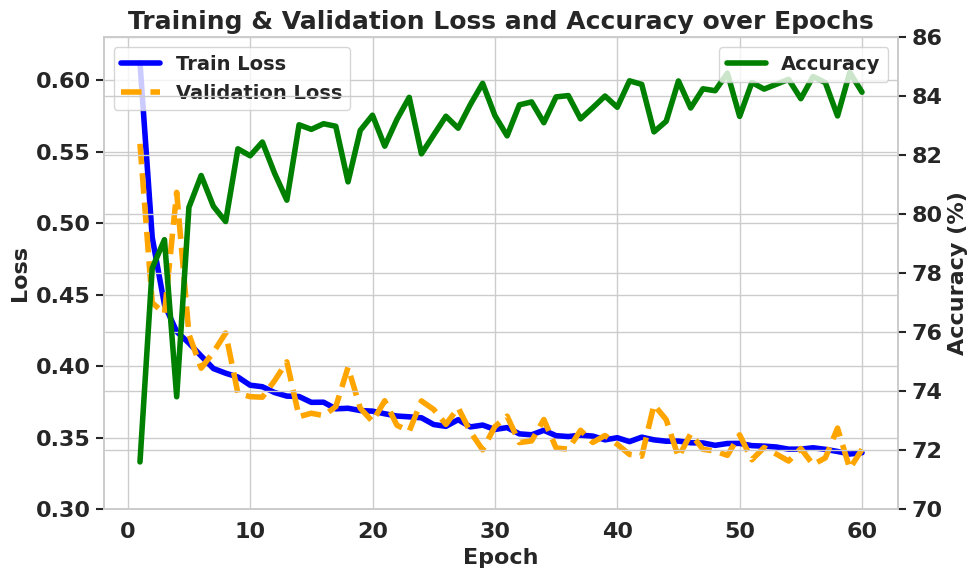

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Load CSV data
granularity = 200
energy = 25  # GeV
data = pd.read_csv(f'../Logs/log_summary_Z_{energy}GeV_{granularity}.csv')
print(data.head())



plt.rcParams.update({
    'font.size': 14,              # General font size
    'font.weight': 'bold',        # General font weight

    'axes.titlesize': 18,         # Title font size
    'axes.titleweight': 'bold',   # Title font weight

    'axes.labelsize': 16,         # Axis label size
    'axes.labelweight': 'bold',   # Axis label font weight

    'xtick.labelsize': 16,        # X tick labels
    'ytick.labelsize': 16,        # Y tick labels
    'xtick.major.width': 1.5,     # Thicker ticks (optional)
    'ytick.major.width': 1.5,

    'legend.fontsize': 14,        # Legend font size
    'legend.title_fontsize': 14,  # Legend title size (if used)
})

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6), )

# Plot Train and Val Loss on the left y-axis
ax1.plot(data['Epoch'], data['Train Loss'], label='Train Loss', color='blue',linewidth=4)
ax1.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', color='orange',linewidth=4, linestyle='--')
y_label_size= 16
ax1.set_ylabel('Loss')
ax1.set_ylim(0, 1)
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Create secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(data['Epoch'], data['Accuracy'], label='Accuracy', color='green',linewidth=4)
ax2.set_ylabel('Accuracy (%)')
ax2.set_ylim(70, 86)
ax1.set_ylim(0.30, 0.63)
ax2.legend(loc='upper right')

plt.title('Training & Validation Loss and Accuracy over Epochs')
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig(f'../Plots/Z_{energy}GeV_{granularity}_loss_accuracy.pdf', bbox_inches='tight')
plt.savefig(f'../Plots/Z_{energy}GeV_{granularity}_loss_accuracy.png', dpi=600, bbox_inches='tight',)


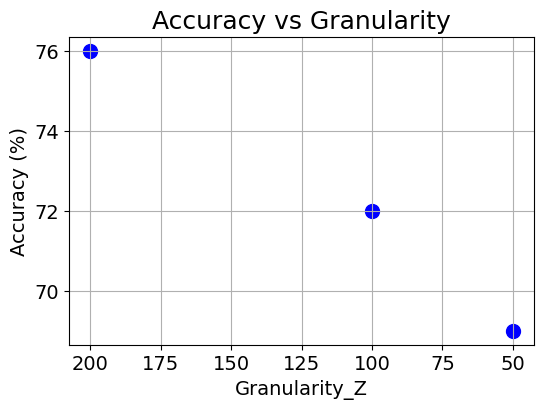

In [1]:
#plot accuracy vs granularity
import matplotlib.pyplot as plt
import numpy as np
accuracy =np.array([76,72,69])
granularity = np.array([200, 100, 50])
plt.rcParams.update({
    'font.size': 16,        # General font size
    'axes.titlesize': 18,   # Title font size
    'axes.labelsize': 14,   # Axis label size
    'xtick.labelsize': 14,  # X tick labels
    'ytick.labelsize': 14,  # Y tick labels
    'legend.fontsize': 14   # Legend font size
})
plt.figure(figsize=(6, 4))
plt.gca().invert_xaxis() 
plt.scatter(granularity, accuracy, color='blue', s=100)

plt.title('Accuracy vs Granularity')
plt.xlabel('Granularity_Z')
plt.ylabel('Accuracy (%)')
plt.grid(True)

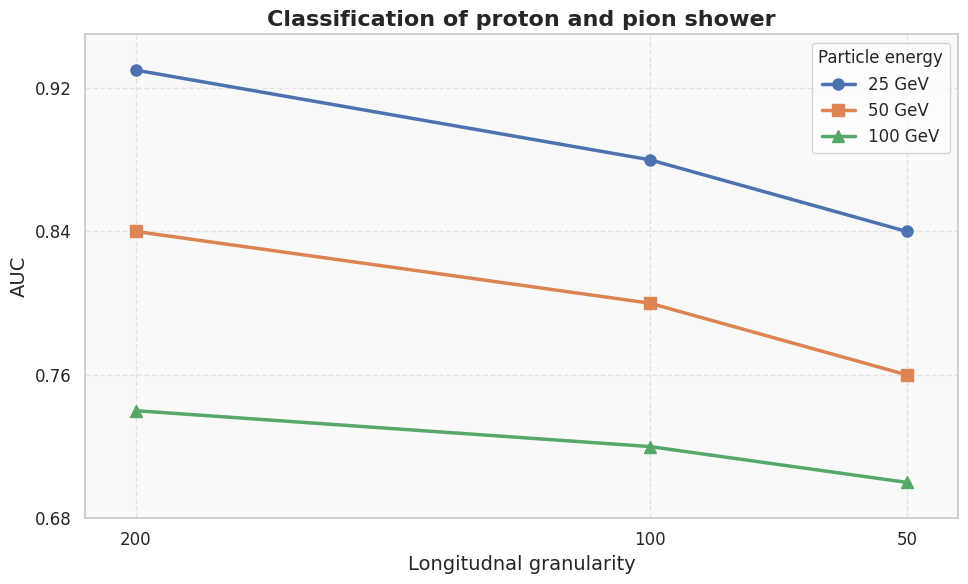

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# X-axis values (descending)
x = [200, 100, 50]

# Example Y values for 3 categories
category_1 = [.93, .88, 0.84]
category_2 = [0.84,0.80, 0.76]
category_3 = [0.74, 0.72,0.70]

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot each category with custom styles
plt.plot(x, category_1, marker='o', label='25 GeV', linewidth=2.5, markersize=8)
plt.plot(x, category_2, marker='s', label='50 GeV', linewidth=2.5, markersize=8)
plt.plot(x, category_3, marker='^', label='100 GeV', linewidth=2.5, markersize=8)

# Axis limits
plt.ylim(0.69, .95)
plt.xlim(50, 200)

# Labels and title
plt.xlabel('Longitudnal granularity', fontsize=14)
plt.ylabel('AUC', fontsize=14)
plt.title('Classification of proton and pion shower', fontsize=16, weight='bold')

# Customize ticks
plt.xticks(x, fontsize=12)
plt.yticks(np.arange(0.68, 0.95, 0.08), fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Particle energy", fontsize=12)

# Add background color and border
plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout()
plt.gca().invert_xaxis()
plt.xlim(210, 40)  # for reversed X-axis
plt.savefig('../Plots/granularity_auc_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()


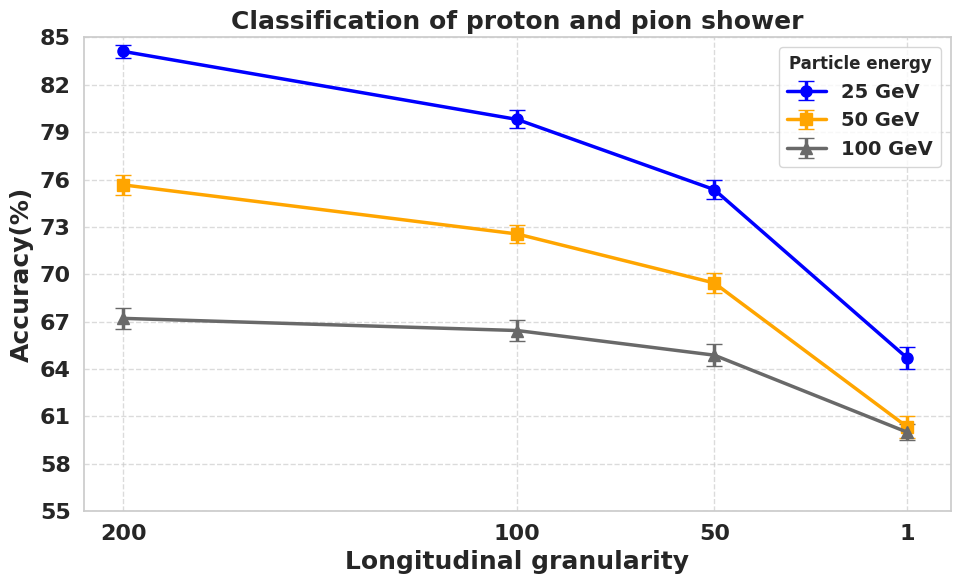

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_theme(style="whitegrid")


x = [200, 100, 50,1]

# Example Y values for 3 energies
E_25 = [84.11, 79.8, 75.36,64.69]
E_50 = [75.66, 72.55, 69.45,60.33]
E_100 = [67.21, 66.44, 64.88,]

#calculated using clopper-pearson method https://ontosight.ai/glossary/term/clopper-pearson-interval-method--67a140846c3593987a550031
uncert_1 = [.41,.57, 0.61,0.7]
uncert_2 = [0.61, 0.54,0.66,.7]
uncert_3 = [0.67, 0.67, 0.68,.5]

plt.figure(figsize=(10, 6))

# Plot each category with error bars
plt.errorbar(x,E_25, yerr=uncert_1, marker='o', label='25 GeV', linewidth=2.5, markersize=8, capsize=6,color='blue')
# plt.axhline(y=64.59, color='lightblue', linestyle='--', linewidth=2)
plt.errorbar(x, E_50, yerr=uncert_2, marker='s', label='50 GeV', linewidth=2.5, markersize=8, capsize=6,color='orange')
plt.errorbar(x, E_100, yerr=uncert_3, marker='^', label='100 GeV', linewidth=2.5, markersize=8, capsize=6, color='dimgray')

plt.ylim(57, 85)
plt.xlim(1, 200)

plt.xlabel('Longitudinal granularity', fontsize=18)
plt.ylabel('Accuracy(%)', fontsize=18)
plt.title('Classification of proton and pion shower', fontsize=18, weight='bold')

plt.xticks(x, fontsize=16)
plt.yticks(np.arange(55, 86, 3), fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Particle energy", fontsize=14)

# plt.gca().set_facecolor("#f9f9f9")
plt.tight_layout()
plt.gca().invert_xaxis()
plt.xlim(210, -10)  # for reversed X-axis
plt.savefig('../Plots/accuracy_vs_granularity.pdf', dpi=300, bbox_inches='tight')
plt.show()

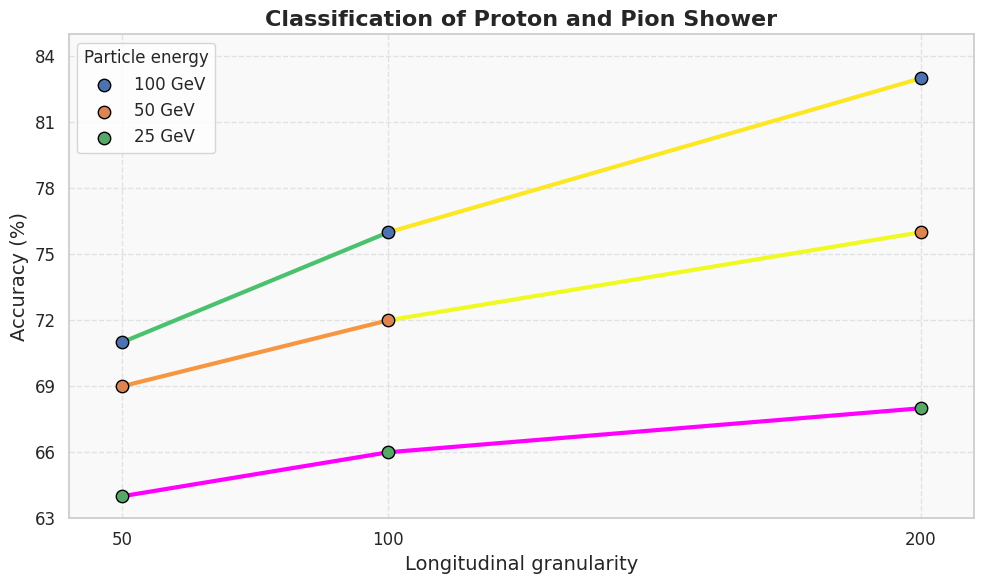

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# Data
x = np.array([200, 100, 50])

# Y-values for 3 categories
category_data = {
    '100 GeV': [83, 76, 71],
    '50 GeV': [76, 72, 69],
    '25 GeV': [68, 66, 64]
}

colors_map = {
    '100 GeV': 'viridis',
    '50 GeV': 'plasma',
    '25 GeV': 'cool'
}

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each category with gradient
for label, y in category_data.items():
    y = np.array(y)
    cmap = plt.get_cmap(colors_map[label])

    # Build segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Rate of change
    delta_y = np.abs(np.diff(y))
    norm = Normalize(vmin=0, vmax=delta_y.max())
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(delta_y)
    lc.set_linewidth(3)

    # Add to plot
    ax.add_collection(lc)
    ax.scatter(x, y, label=label, s=80, edgecolor='black', zorder=3)

# Axes config
ax.set_xlim(210, 40)  # reversed
ax.set_ylim(63, 85)
ax.invert_xaxis()

ax.set_xlabel('Longitudinal granularity', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Classification of Proton and Pion Shower', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_yticks(np.arange(63, 86, 3))
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_facecolor('#f9f9f9')

# Legend
ax.legend(title="Particle energy", fontsize=12)

plt.tight_layout()
plt.show()



In [15]:
import re
import pandas as pd

log_file_path = '/home/alma1/PointCloud_ML/log_100.txt'

# Read the log file
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Prepare regex patterns
epoch_pattern = r"Epoch \[(\d+)/\d+\], Train Loss: ([\d.]+), Val Loss: ([\d.]+)"
accuracy_pattern = r"Accuracy: ([\d.]+)%"

# Storage for extracted data
results = []

for i in range(len(lines)):
    epoch_match = re.search(epoch_pattern, lines[i])
    if epoch_match:
        epoch = int(epoch_match.group(1))
        train_loss = float(epoch_match.group(2))
        val_loss = float(epoch_match.group(3))

        # Look ahead for accuracy in the previous few lines
        accuracy = None
        for j in range(i-1, max(i-5, -1), -1):
            acc_match = re.search(accuracy_pattern, lines[j])
            if acc_match:
                accuracy = float(acc_match.group(1))
                break

        results.append({
            "Epoch": epoch,
            "Train Loss": train_loss,
            "Val Loss": val_loss,
            "Accuracy": accuracy
        })

# Save to CSV
df = pd.DataFrame(results)
df.to_csv("log_summary_z_200_F.csv", index=False)
print("Saved to log_summary.csv")


Saved to log_summary.csv


In [20]:
import pickle
import matplotlib.pyplot as plt
pion_dir = "/mnt/d/small_PKL_pion_200/spion1.pkl"
proton_dir = "/mnt/d/small_PKL_proton_200/sproton1.pkl"

proton=pd.read_pickle(proton_dir)
pion=pd.read_pickle(pion_dir)
max_z=proton.loc[proton['z'].idxmax()]

max_z



x                94.000000
y                87.000000
z               157.000000
total_energy      0.001791
mean_time       463.705654
Name: 5518, dtype: float64

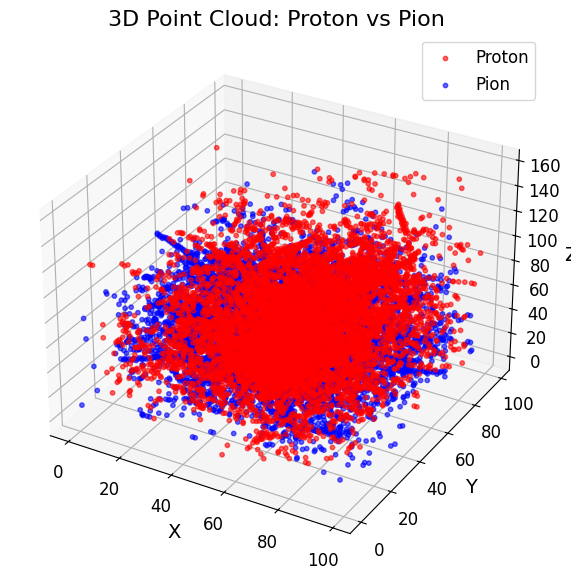

In [7]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Load data
pion_dir = "/mnt/d/small_PKL_pion_200/spion1.pkl"
proton_dir = "/mnt/d/small_PKL_proton_200/sproton1.pkl"

proton = pd.read_pickle(proton_dir)
pion = pd.read_pickle(pion_dir)

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot proton points in red
ax.scatter(proton['x'], proton['y'], proton['z'], c='r', label='Proton', s=10, alpha=0.6)

# Plot pion points in blue
ax.scatter(pion['x'], pion['y'], pion['z'], c='b', label='Pion', s=10, alpha=0.6)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud: Proton vs Pion')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Load data
pion_dir = "/mnt/d/small_PKL_pion_200/spion1.pkl"
proton_dir = "/mnt/d/small_PKL_proton_200/sproton1.pkl"

proton = pd.read_pickle(proton_dir)
pion = pd.read_pickle(pion_dir)

# Create traces
proton_trace = go.Scatter3d(
    x=proton['x'],
    y=proton['y'],
    z=proton['z'],
    mode='markers',
    marker=dict(
        size=3,
        color='red',
        opacity=0.7
    ),
    name='Proton'
)

pion_trace = go.Scatter3d(
    x=pion['x'],
    y=pion['y'],
    z=pion['z'],
    mode='markers',
    marker=dict(
        size=3,
        color='blue',
        opacity=0.7
    ),
    name='Pion'
)

# Layout with larger title and tick label fonts
layout = go.Layout(
    title='3D Point Cloud: Proton vs Pion',
    scene=dict(
        xaxis=dict(
            title='X',
            titlefont=dict(size=20),
            tickfont=dict(size=16)
        ),
        yaxis=dict(
            title='Y',
            titlefont=dict(size=20),
            tickfont=dict(size=16)
        ),
        zaxis=dict(
            title='Z',
            titlefont=dict(size=20),
            tickfont=dict(size=16)
        ),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(
        x=0.8,
        y=0.9,
        font=dict(size=18)
    ),
    titlefont=dict(size=20)
)

# Combine and plot
fig = go.Figure(data=[proton_trace, pion_trace], layout=layout)

# Save to HTML
pyo.plot(fig, filename='proton_pion_point_cloud.html')


'proton_pion_point_cloud.html'

MESA: error: ZINK: failed to choose pdev
libEGL warning: egl: failed to create dri2 screen
